###**HR ANALYSTICS CASE STUDY**


##IMPORT LYBRARY & DATA

In [ ]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
import seaborn as sns
from PIL import Image
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
#import dữ liệu bằng link
link1='https://drive.google.com/file/d/1K4YqqejEALTBqg5msifKSaRaLdSFsHQ9/view?usp=share_link'
path1 = 'https://drive.google.com/uc?export=download&id='+link1.split('/')[-2]
df_general = pd.read_csv(path1)

link2='https://drive.google.com/file/d/1GubG7CRjQMAYSTbCSYiOZuMCI-B2WFO4/view?usp=share_link'
path2 = 'https://drive.google.com/uc?export=download&id='+link2.split('/')[-2]
df_employee = pd.read_csv(path2)

link3='https://drive.google.com/file/d/1LBlGnuoZHe9LxDmCWzVTJKIwX0r5LyR0/view?usp=share_link'
path3 = 'https://drive.google.com/uc?export=download&id='+link3.split('/')[-2]
df_manager = pd.read_csv(path3)

###about dataset


1.   Age: Age of the employee
2.   Attrition: Whether the employee left in the previous year or not (target)
3. BusinessTravel: How frequently the employees travelled for business purposes in the last year
4. Department: Department in company
5. DistanceFromHome: Distance from home in kms
6. Education: Education Level (1:below college, 2:college, 3:bachelor, 4:master, 5:doctor)
7. EducationField
8. EmployeeCount
9. EmployeeNumber
10. EnvironmentSatisfaction: Work Environment Satisfaction Level (1:Low, 2:Medium, 3:High, 4:very high)
11. Gender
12. JobInvolvement: Job Involvement Level
13. JobLevel: Job level at company on a scale of 1 to 5
14. JobSatisfaction: Job Satisfaction Level (1:Low, 2:Medium, 3:High, 4:very high)
15. MaritalStatus: Marital status of the employee (married, single, divorce)
16. MonthlyIncome: Monthly income in rupees per month
17. NumCompaniesWorked: Total number of companies the employee has worked for
18. Over18: Whether the employee is above 18 years of age or not
19. PercentSalaryHike: Percent salary hike for last year
20. PerformanceRating: Performance rating for last year (1:low, 2:good, 3:excellent, 4:outstanding)
21. RelationshipSatisfaction: Relationship satisfaction level (1:Low, 2:Medium, 3:High, 4:very high)
22. StandardHours: Standard hours of work for the employee
23. StockOptionLevel: Stock option level of the employee
24. TotalWorkingYears: Total number of years the employee has worked so far
25. TrainingTimesLastYear: Number of times training was conducted for this employee last year
26. WorkLifeBalance: Work life balance level (1:bad, 2:good, 3:better, 4:best)
27. YearsAtCompany: Total number of years spent at the company by the employee
28. YearsSinceLastPromotion: Number of years since last promotion
29. YearsWithCurrManager: Number of years under current manager

###Data exploration

In [ ]:
df_general.head(10)
#df_employee.head(5)
#df_manager.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [ ]:
#merge 2 tables employee & general
merged_df = pd.merge(df_general, df_employee, on='EmployeeID')

In [ ]:
#merge 2 tables merged_df & general
merged_df = pd.merge(merged_df, df_manager, on='EmployeeID')

In [ ]:
merged_df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [ ]:
df = merged_df
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
#move 2 columns EmployeeID & Attrition to the left
col_move = df[['EmployeeID', 'Attrition']]
df=df.drop(['EmployeeID', 'Attrition'], axis=1)
df=pd.concat([col_move, df], axis=1)
df.head(10)

,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,6,No,46,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,7,Yes,28,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,8,No,29,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,9,No,31,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,10,No,25,Non-Travel,Research & Development,7,4,Medical,1,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   Age                      4410 non-null   int64  
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
#check null values
print(df.isnull().sum())

EmployeeID                  0
Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [ ]:
print(df.value_counts(['EnvironmentSatisfaction']))

EnvironmentSatisfaction
3.0                        1350
4.0                        1334
2.0                         856
1.0                         845
dtype: int64


In [ ]:
# check null values of 'EnvironmentSatisfaction' with gender, fill mode value with gender

In [ ]:
max_envi_by_gender = df.groupby('Gender')['EnvironmentSatisfaction'].apply(lambda x: x.mode().iloc[0])
max_envi_by_gender

Gender
Female    4.0
Male      3.0
Name: EnvironmentSatisfaction, dtype: float64

In [ ]:
df.groupby(['Gender'])['EnvironmentSatisfaction'].value_counts(normalize=True)

Gender  EnvironmentSatisfaction
Female  4.0                        0.308874
        3.0                        0.306598
        2.0                        0.215586
        1.0                        0.168942
Male    3.0                        0.308717
        4.0                        0.301104
        1.0                        0.208603
        2.0                        0.181576
Name: EnvironmentSatisfaction, dtype: float64

In [ ]:
df['EnvironmentSatisfaction'] = df.groupby('Gender')['EnvironmentSatisfaction'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
#fill values in null of JobSatisfaction
df.groupby(['Gender'])['JobSatisfaction'].value_counts(normalize=True)

Gender  JobSatisfaction
Female  3.0                0.306204
        4.0                0.306204
        1.0                0.211725
        2.0                0.175868
Male    4.0                0.314850
        3.0                0.298139
        2.0                0.201671
        1.0                0.185340
Name: JobSatisfaction, dtype: float64

In [ ]:
max_value = df['JobSatisfaction'].max()
max_value

4.0

In [ ]:
df['JobSatisfaction'].fillna(max_value, inplace=True)

In [ ]:
#WorkLifeBalance
df.groupby(['Gender'])['WorkLifeBalance'].value_counts(normalize=True)

Gender  WorkLifeBalance
Female  3.0                0.643429
        2.0                0.211429
        4.0                0.097143
        1.0                0.048000
Male    3.0                0.585050
        2.0                0.247521
        4.0                0.108314
        1.0                0.059115
Name: WorkLifeBalance, dtype: float64

In [ ]:
df['WorkLifeBalance'] = df.groupby('Gender')['WorkLifeBalance'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
df.groupby(['Gender'])['NumCompaniesWorked'].value_counts(normalize=True)

Gender  NumCompaniesWorked
Female  1.0                   0.349062
        3.0                   0.115406
        0.0                   0.106310
        4.0                   0.104036
        2.0                   0.095509
        6.0                   0.051165
        7.0                   0.046049
        5.0                   0.045480
        9.0                   0.044343
        8.0                   0.042638
Male    1.0                   0.358663
        0.0                   0.151596
        3.0                   0.102964
        2.0                   0.102584
        4.0                   0.088146
        7.0                   0.053571
        6.0                   0.044833
        5.0                   0.040653
        9.0                   0.029635
        8.0                   0.027356
Name: NumCompaniesWorked, dtype: float64

In [ ]:
#xử lý null cột NumCompaniesWorked
mean_value_numCom=df.groupby('Gender')['NumCompaniesWorked'].mean()
mean_value_numCom

Gender
Female    2.899375
Male      2.558131
Name: NumCompaniesWorked, dtype: float64

In [ ]:
df['NumCompaniesWorked'] = df.groupby('Gender')['NumCompaniesWorked'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#fill mean values for TotalWorkingYears
mean_value_WY=df.groupby('Gender')['TotalWorkingYears'].mean()
mean_value_WY

Gender
Female    11.542873
Male      11.104545
Name: TotalWorkingYears, dtype: float64

In [ ]:
df['TotalWorkingYears'] = df.groupby('Gender')['TotalWorkingYears'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
print(df.isnull().sum())

EmployeeID                 0
Attrition                  0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


# DATA VISUALIZATION

In [ ]:
df.groupby(['Gender'])['Attrition'].value_counts(normalize=True)

Gender  Attrition
Female  No           0.846939
        Yes          0.153061
Male    No           0.833333
        Yes          0.166667
Name: Attrition, dtype: float64

In [ ]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

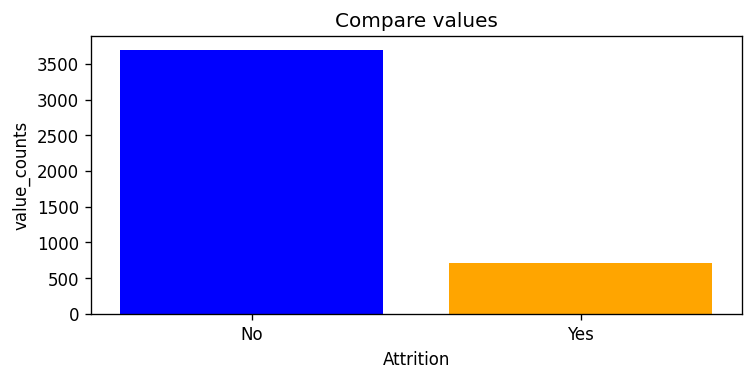

In [ ]:
#Consider the difference of column attrition
value_counts = merged_df['Attrition'].value_counts()
plt.bar(value_counts.index, value_counts.values, color = ['blue','orange'])
plt.title('Compare values')
plt.xlabel('Attrition')
plt.ylabel('value_counts')
plt.show()

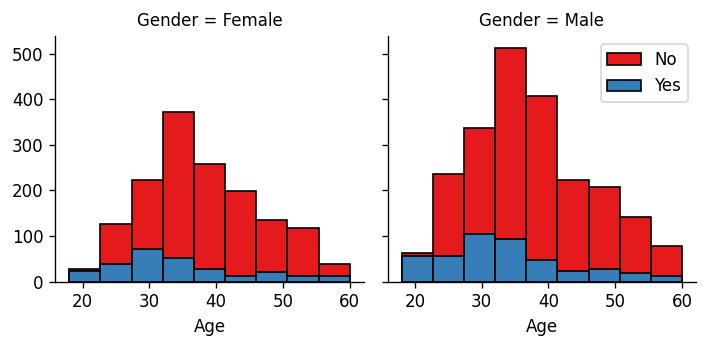

In [ ]:
#Distribution of data on the decision to leave work of 2 sexes Male and female by age
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Attrition", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

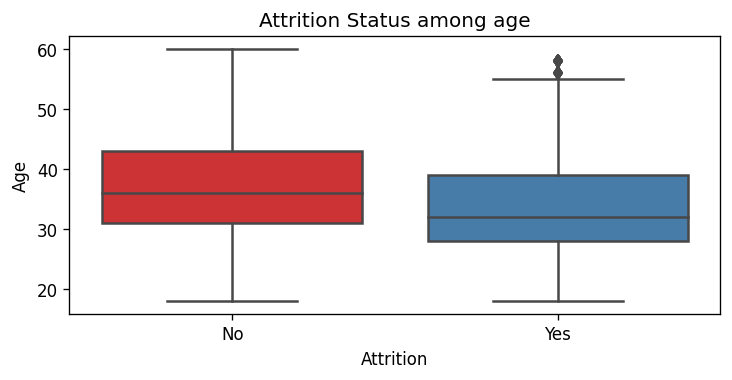

In [ ]:
#check outlier of Age
sns.boxplot(x='Attrition',y='Age',palette="Set1",data=df)
plt.title('Attrition Status among age')
plt.show()


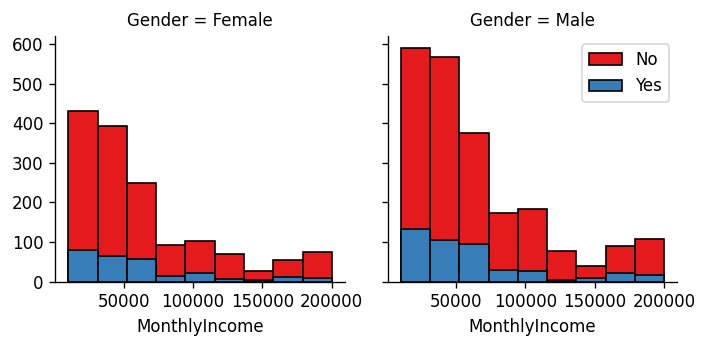

In [ ]:
#Distribution of data by income
bins = np.linspace(df.MonthlyIncome.min(), df.MonthlyIncome.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Attrition", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyIncome', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

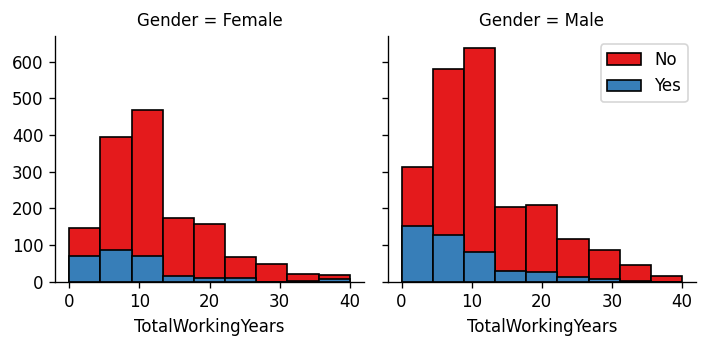

In [ ]:
#Distribution of data by TotalWorkingYears
bins = np.linspace(df.TotalWorkingYears.min(), df.TotalWorkingYears.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Attrition", palette="Set1", col_wrap=2)
g.map(plt.hist, 'TotalWorkingYears', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

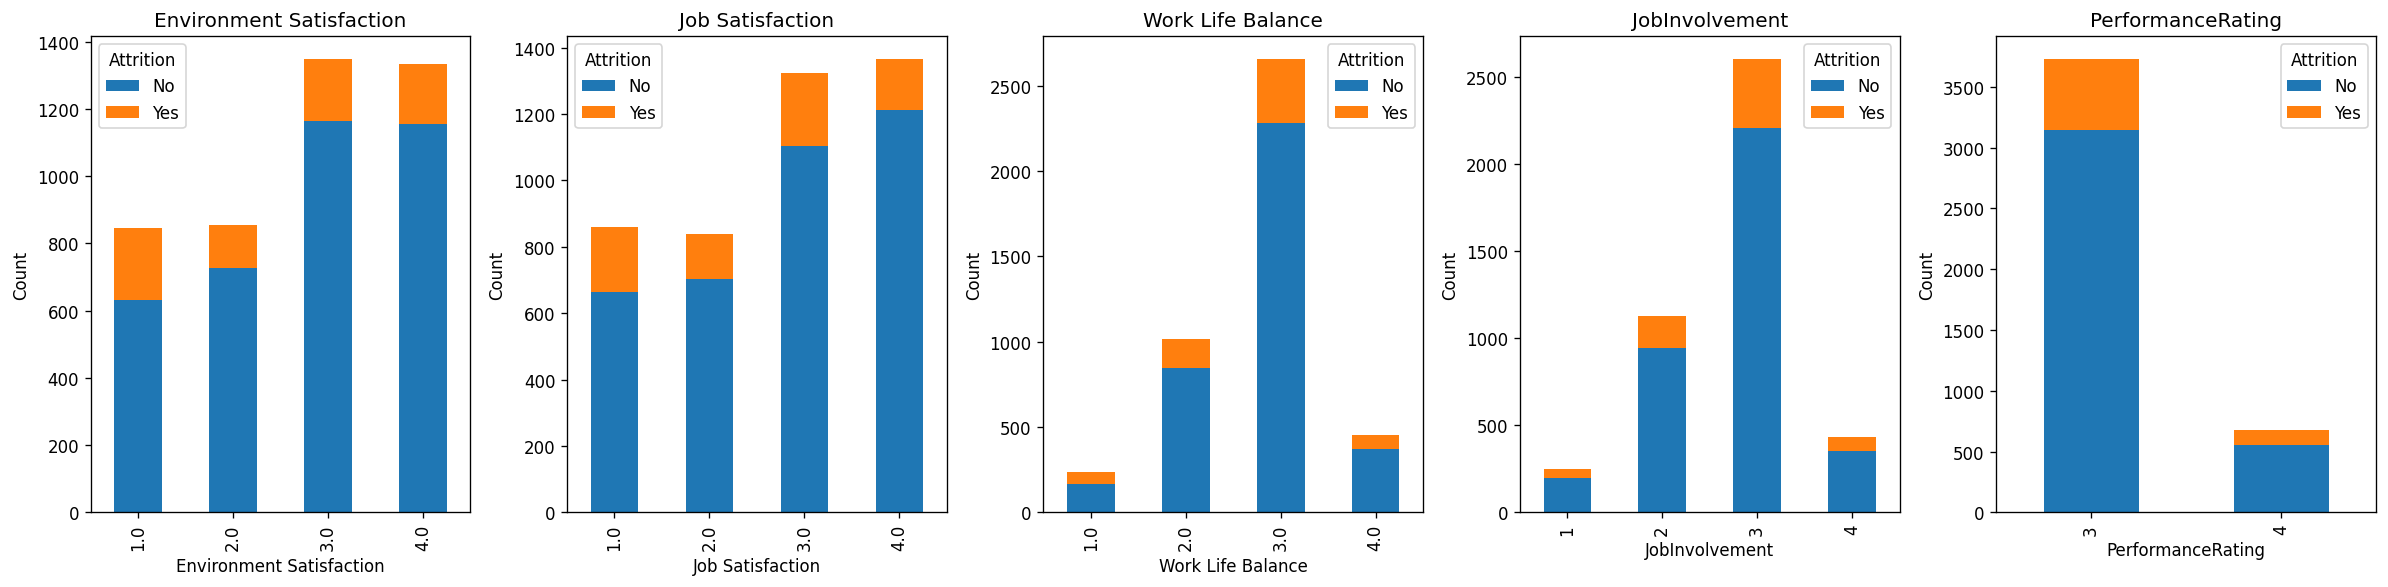

In [ ]:
import matplotlib.pyplot as plt

# Tạo figure và axes cho 3 biểu đồ
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Biểu đồ 1: Environment Satisfaction
value_counts_1 = merged_df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack().fillna(0)
value_counts_1.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Environment Satisfaction')
axes[0].set_xlabel('Environment Satisfaction')
axes[0].set_ylabel('Count')

# Biểu đồ 2: Job Satisfaction
value_counts_2 = merged_df.groupby(['JobSatisfaction', 'Attrition']).size().unstack().fillna(0)
value_counts_2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Job Satisfaction')
axes[1].set_xlabel('Job Satisfaction')
axes[1].set_ylabel('Count')

# Biểu đồ 3: Work Life Balance
value_counts_3 = merged_df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack().fillna(0)
value_counts_3.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Work Life Balance')
axes[2].set_xlabel('Work Life Balance')
axes[2].set_ylabel('Count')

# Biểu đồ 4: JobInvolvement
value_counts_4 = merged_df.groupby(['JobInvolvement', 'Attrition']).size().unstack().fillna(0)
value_counts_4.plot(kind='bar', stacked=True, ax=axes[3])
axes[3].set_title('JobInvolvement')
axes[3].set_xlabel('JobInvolvement')
axes[3].set_ylabel('Count')

# Biểu đồ 5: PerformanceRating
value_counts_5 = merged_df.groupby(['PerformanceRating', 'Attrition']).size().unstack().fillna(0)
value_counts_5.plot(kind='bar', stacked=True, ax=axes[4])
axes[4].set_title('PerformanceRating')
axes[4].set_xlabel('PerformanceRating')
axes[4].set_ylabel('Count')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# Pre-processing: Feature selection

In [ ]:
df

,EmployeeID,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,No,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.000000,6,1,0,0,3.0,4.0,2.0,3,3
1,2,Yes,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.000000,3,5,1,4,3.0,2.0,4.0,2,4
2,3,No,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.000000,2,5,0,3,2.0,2.0,1.0,3,3
3,4,No,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.000000,5,8,7,5,4.0,4.0,3.0,2,3
4,5,No,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.000000,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,No,42,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.000000,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,No,29,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.000000,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,No,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.000000,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,No,42,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.000000,2,9,7,8,4.0,1.0,3.0,2,3


In [ ]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694628,15.209524,8.0,...,11.279877,2.799320,7.008163,2.187755,4.123129,2.726531,2.734014,2.763492,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.493518,3.659108,0.0,...,7.774281,1.288978,6.125135,3.221699,3.567327,1.090818,1.102071,0.703541,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
#drop columns haven't got distribution for models (ID, Employeecount, hour, over18)
df=df.drop(['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours' ], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [ ]:
#change data type of Attrition to numeric
df['Attrition'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Attrition']

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [ ]:
df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']] = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype(int)

In [ ]:

feature = df.iloc[:,1:]
feature

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,1.000000,6,1,0,0,3,4,2,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,6.000000,3,5,1,4,3,2,4,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,5.000000,2,5,0,3,2,2,1,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,13.000000,5,8,7,5,4,4,3,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,9.000000,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,...,10.000000,5,3,0,2,4,1,3,3,3
4406,29,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,...,10.000000,2,3,0,2,4,4,3,2,3
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,...,5.000000,4,4,1,2,1,3,3,3,4
4408,42,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,...,10.000000,2,9,7,8,4,1,3,2,3


In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   Gender                   4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MaritalStatus            4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4410 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

# ONE-HOT ENDCODING

In [ ]:
object_cols = feature.select_dtypes(include=['object']).columns
feature[object_cols] = df[object_cols].astype('category')


In [ ]:
feature_onehot = pd.get_dummies(feature)
feature_onehot

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.000000,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.000000,3,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.000000,2,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.000000,5,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.000000,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,3.0,17,1,10.000000,5,...,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.000000,2,...,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,2,37020,0.0,20,0,5.000000,4,...,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,23980,0.0,14,1,10.000000,2,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
feature_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   int64  
 2   Education                          4410 non-null   int64  
 3   JobLevel                           4410 non-null   int64  
 4   MonthlyIncome                      4410 non-null   int64  
 5   NumCompaniesWorked                 4410 non-null   float64
 6   PercentSalaryHike                  4410 non-null   int64  
 7   StockOptionLevel                   4410 non-null   int64  
 8   TotalWorkingYears                  4410 non-null   float64
 9   TrainingTimesLastYear              4410 non-null   int64  
 10  YearsAtCompany                     4410 non-null   int64  
 11  YearsSinceLastPromotion            4410 non-null   int64

# SCALER DATA

In [ ]:
X= feature_onehot
X

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.000000,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.000000,3,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.000000,2,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.000000,5,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.000000,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,3.0,17,1,10.000000,5,...,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.000000,2,...,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,2,37020,0.0,20,0,5.000000,4,...,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,23980,0.0,14,1,10.000000,2,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
Y= df['Attrition'].values
Y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X.shape, Y.shape

((4410, 44), (4410,))

In [ ]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.64866811,  0.09963874, -1.86842575, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.53487311,
         1.08823234, -0.68556546],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.55585225,  1.0867926 , -0.89168825, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [ 0.33684855,  2.32073492,  0.08504925, ...,  1.86960232,
        -0.91892141, -0.68556546]])

In [ ]:
X.shape, Y.shape

((4410, 44), (4410,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((2646, 44), (2646,))

In [ ]:
from imblearn.over_sampling import SMOTE
SM_Model=SMOTE()
X_train_SM, y_train_SM=SM_Model.fit_resample(X_train,y_train)
X_train_SM.shape, y_train_SM.shape
#sử dụng smote để over sampling data để cân bằng bộ dữ liệu cho máy học

((4426, 44), (4426,))

In [ ]:
X_train_SM.shape, y_train_SM.shape

((4426, 44), (4426,))

In [ ]:
print("Kích thước tập train:", X_train_SM.shape)
print("Kích thước tập test:", X_test.shape)

Kích thước tập train: (4426, 44)
Kích thước tập test: (1764, 44)


# CLASSIFICATION

In [ ]:
#Logistic, decision tree, randomforest, KNN, GNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

##Logistic Regression

In [ ]:
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train_SM,y_train_SM)

LogisticRegression()

In [ ]:
y_predict_LR = LR_model.predict(X_test)
y_predict_LR

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
LR_score_train = LR_model.score(X_train_SM,y_train_SM)
LR_score_test = LR_model.score(X_test, y_test)
print("model score for train data:",LR_score_train )
print("model score for test data:",LR_score_test )

model score for train data: 0.745594215996385
model score for test data: 0.6921768707482994


In [ ]:
LR_accuracy = accuracy_score(y_test, y_predict_LR)
print("Độ chính xác:",LR_accuracy)

Độ chính xác: 0.6921768707482994


In [ ]:
LR_f1 = f1_score(y_test, y_predict_LR)
LR_f1

0.3919372900335946

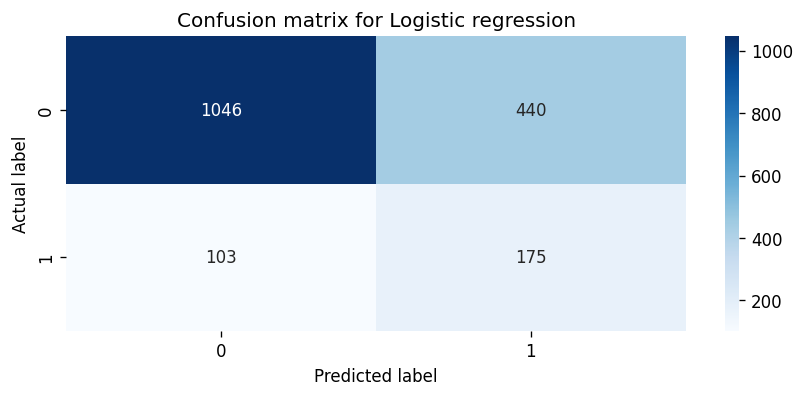

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predict_LR)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix for Logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## DecissionTree

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_model.fit(X_train_SM,y_train_SM)

DecisionTreeClassifier()

In [ ]:
y_predict_DT = DT_model.predict(X_test)
y_predict_DT

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
DT_model.score(X_test, y_test)

0.953514739229025

In [ ]:
DT_accuracy = accuracy_score(y_test, y_predict_DT)
print("Độ chính xác:", DT_accuracy)

Độ chính xác: 0.953514739229025


In [ ]:
DT_f1 = f1_score(y_test, y_predict_DT)
DT_f1

0.849264705882353

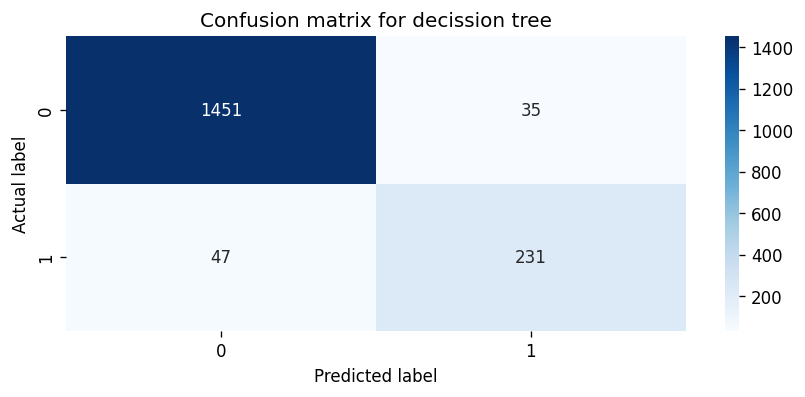

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predict_DT)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix for decission tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=5)
RF_model.fit(X_train_SM,y_train_SM)


RandomForestClassifier(n_estimators=5)

In [ ]:
y_predict_RF = RF_model.predict(X_test)

In [ ]:
RF_accuracy= accuracy_score(y_test, y_predict_RF)
print("Độ chính xác:",RF_accuracy )

Độ chính xác: 0.9540816326530612


In [ ]:
RF_f1 = f1_score(y_test, y_predict_RF)
RF_f1

0.852994555353902

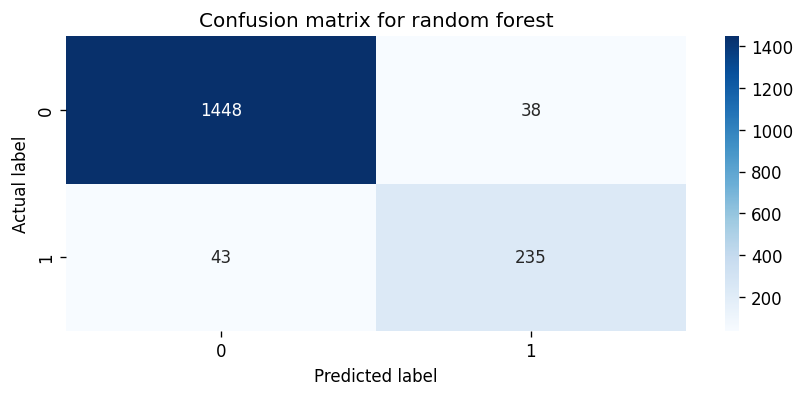

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predict_RF)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## K-Nearest Neighbors

In [ ]:
k_best = 0
best_acc = 0
for k in range (1,50): # thay so luong neighbors tu 5 -> 100
  KNN_model = KNeighborsClassifier(n_neighbors=k)
  KNN_model.fit(X_train_SM,y_train_SM)
  y_predict_KNN = KNN_model.predict(X_test)
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_predict_KNN))

  if best_acc < metrics.accuracy_score(y_test, y_predict_KNN):
      best_acc = metrics.accuracy_score(y_test, y_predict_KNN)
      k_best = k

Accuracy at k = 1 0.9467120181405896
Accuracy at k = 2 0.9478458049886621
Accuracy at k = 3 0.8503401360544217
Accuracy at k = 4 0.8605442176870748
Accuracy at k = 5 0.7789115646258503
Accuracy at k = 6 0.7902494331065759
Accuracy at k = 7 0.731859410430839
Accuracy at k = 8 0.753968253968254
Accuracy at k = 9 0.703514739229025
Accuracy at k = 10 0.7210884353741497
Accuracy at k = 11 0.6740362811791383
Accuracy at k = 12 0.6870748299319728
Accuracy at k = 13 0.6632653061224489
Accuracy at k = 14 0.6746031746031746
Accuracy at k = 15 0.6462585034013606
Accuracy at k = 16 0.6587301587301587
Accuracy at k = 17 0.6388888888888888
Accuracy at k = 18 0.6490929705215419
Accuracy at k = 19 0.6116780045351474
Accuracy at k = 20 0.6252834467120182
Accuracy at k = 21 0.6043083900226758
Accuracy at k = 22 0.6167800453514739
Accuracy at k = 23 0.5941043083900227
Accuracy at k = 24 0.6060090702947846
Accuracy at k = 25 0.5895691609977324
Accuracy at k = 26 0.6026077097505669
Accuracy at k = 27 0.578

In [ ]:
k_best

2

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train_SM,y_train_SM)
y_predict_KNN = KNN_model.predict(X_test)

In [ ]:
KNN_accuracy = accuracy_score(y_test, y_predict_KNN)
print("Độ chính xác:",KNN_accuracy )

Độ chính xác: 0.9467120181405896


In [ ]:
KNN_f1 = f1_score(y_test, y_predict_KNN)
KNN_f1

0.8379310344827586

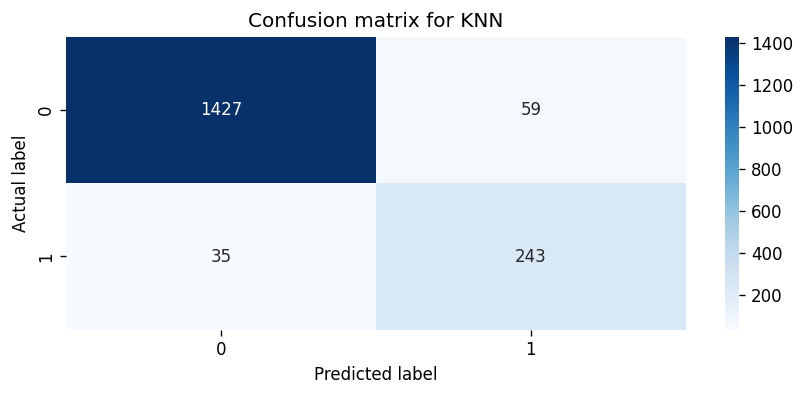

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predict_KNN)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Gaussian Naive Bayes

In [ ]:
GNB_model = GaussianNB()
GNB_model.fit(X_train_SM,y_train_SM)
y_predict_GNB = GNB_model.predict(X_test)

In [ ]:
GNB_accuracy = accuracy_score(y_test, y_predict_GNB)
print("Độ chính xác:",GNB_accuracy )

Độ chính xác: 0.6643990929705216


In [ ]:
GNB_f1 = f1_score(y_test, y_predict_GNB)
GNB_f1

0.37021276595744673

## Conclusion

In [ ]:
print("Độ chính xác của mô hình Logistic Regression:", "{:.2f}%".format(LR_accuracy*100))
print("Độ chính xác của mô hình Decission tree:", "{:.2f}%".format(DT_accuracy*100))
print("Độ chính xác của mô hình Random forest:", "{:.2f}%".format(RF_accuracy*100))
print("Độ chính xác của mô hình K nearest neighbor:", "{:.2f}%".format(KNN_accuracy*100))
print("Độ chính xác của mô hình Gausian naive bayes:", "{:.2f}%".format(GNB_accuracy*100))

Độ chính xác của mô hình Logistic Regression: 69.22%
Độ chính xác của mô hình Decission tree: 95.35%
Độ chính xác của mô hình Random forest: 95.41%
Độ chính xác của mô hình K nearest neighbor: 94.67%
Độ chính xác của mô hình Gausian naive bayes: 66.44%


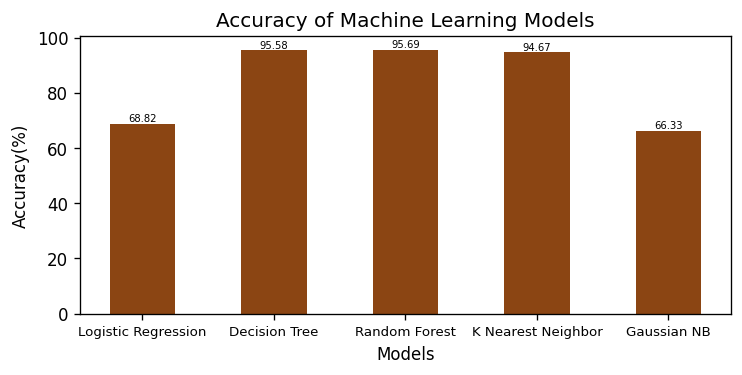

In [ ]:
# Dữ liệu độ chính xác của các mô hình
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'Gaussian NB']
accuracies = [68.82, 95.58, 95.69, 94.67, 66.33]
#colors = ['red', 'blue', 'green', 'orange', 'purple']
# Vẽ biểu đồ cột
plt.bar(models, accuracies, width=0.5, color='saddlebrown')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')

# Hiển thị giá trị trên cột
for i, v in enumerate(accuracies):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=6)
plt.xticks(fontsize =8)
# Hiển thị biểu đồ
plt.show()


In [ ]:
print("F1 score của mô hình Logistic Regression:", "{:.2f}%".format(LR_f1*100))
print("F1 score của mô hình Decission tree:", "{:.2f}%".format(DT_f1*100))
print("F1 score của mô hình Random forest:", "{:.2f}%".format(RF_f1*100))
print("F1 score của mô hình K nearest neighbor:", "{:.2f}%".format(KNN_f1*100))
print("F1 score của mô hình Gausian naive bayes:", "{:.2f}%".format(GNB_f1*100))

F1 score của mô hình Logistic Regression: 39.19%
F1 score của mô hình Decission tree: 84.93%
F1 score của mô hình Random forest: 85.30%
F1 score của mô hình K nearest neighbor: 83.79%
F1 score của mô hình Gausian naive bayes: 37.02%


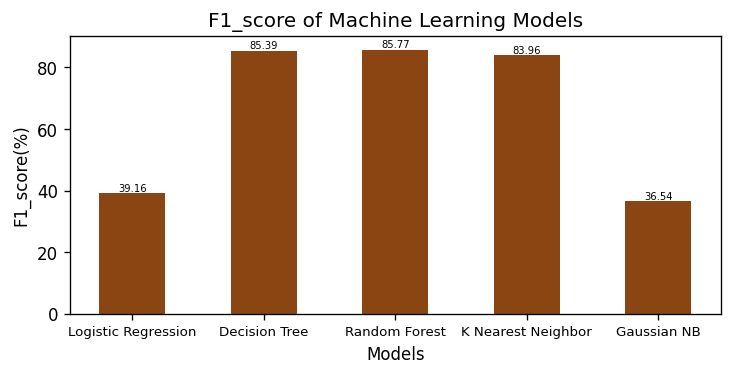

In [ ]:
# Dữ liệu độ chính xác của các mô hình
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'Gaussian NB']
F1_score = [39.16, 85.39, 85.77, 83.96, 36.54]
#colors = ['red', 'blue', 'green', 'orange', 'purple']
# Vẽ biểu đồ cột
plt.bar(models, F1_score, width=0.5, color='saddlebrown')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('F1_score of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('F1_score(%)')

# Hiển thị giá trị trên cột
for i, v in enumerate(F1_score):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=6)
plt.xticks(fontsize =8)
# Hiển thị biểu đồ
plt.show()

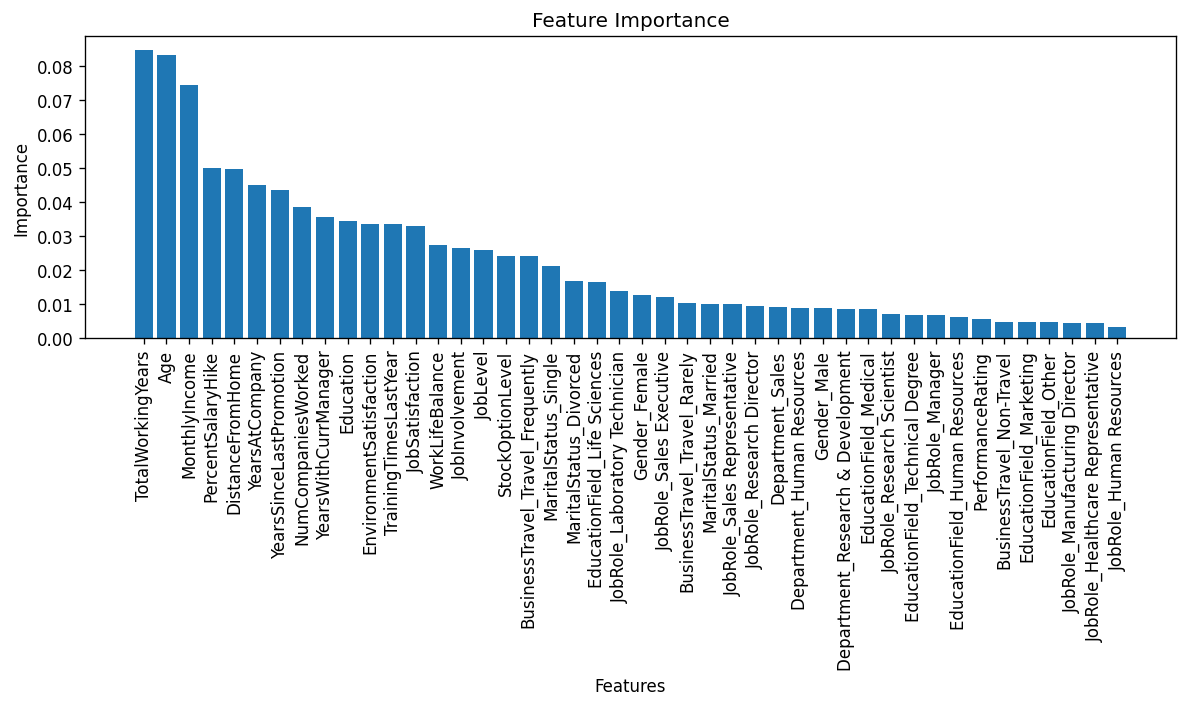

In [ ]:
feature_names = feature_onehot.columns.tolist()
# Xác định số lượng đặc trưng
num_features = X_train_SM.shape[1]

# Tính toán độ quan trọng của các đặc trưng
feature_importance = RF_model.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng giảm dần
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]

# Lấy tên đặc trưng từ vị trí đã sắp xếp
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Vẽ biểu đồ cột thể hiện độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), sorted_feature_importance, align='center')
plt.xticks(range(num_features), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()



#Bonus

In [ ]:
df.groupby(['Gender'])['Attrition'].value_counts(normalize=True)

Gender  Attrition
Female  0            0.846939
        1            0.153061
Male    0            0.833333
        1            0.166667
Name: Attrition, dtype: float64

In [ ]:


# Lọc dữ liệu theo tiêu chí tuổi dưới 40
filtered_data = df[(df['Age'] < 40) & (df['EnvironmentSatisfaction'] < 2)]

# Tính toán kết quả
result = filtered_data.groupby(['Gender', 'Attrition'])['Attrition'].count().groupby(level=0).apply(lambda x: x / x.sum())

# In kết quả
print(result)


Gender  Attrition
Female  0            0.721311
        1            0.278689
Male    0            0.698276
        1            0.301724
Name: Attrition, dtype: float64


<ipython-input-97-35ce464a5897>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  result = filtered_data.groupby(['Gender', 'Attrition'])['Attrition'].count().groupby(level=0).apply(lambda x: x / x.sum())


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [ ]:
import scipy.stats as stats

In [ ]:
import numpy as np
from scipy import stats

#Y = df['Attrition'].values
#X = preprocessing.StandardScaler().fit_transform(X)

# Tính correlation và P-value cho mỗi feature trong X với Y
correlations = []
p_values = []

for i in range(X.shape[1]):
    feature = X[:, i]
    correlation, p_value = stats.pearsonr(feature, Y)
    correlations.append(correlation)
    p_values.append(p_value)

# In kết quả
for i in range(len(correlations)):
    print("Feature", i+1)
    print("Correlation:", correlations[i])
    print("P-value:", p_values[i])
    print()


Feature 1
Correlation: -0.15920500686577943
P-value: 1.9968016158893646e-26

Feature 2
Correlation: -0.00973014101017967
P-value: 0.5182860428055663

Feature 3
Correlation: -0.015111167710968708
P-value: 0.3157293177122367

Feature 4
Correlation: -0.010289713287494902
P-value: 0.4945171727187514

Feature 5
Correlation: -0.03117628169811501
P-value: 0.03842748490605255

Feature 6
Correlation: 0.04221585701864616
P-value: 0.005048563343197966

Feature 7
Correlation: 0.03253259489105353
P-value: 0.03074338643339161

Feature 8
Correlation: -0.006838852403261554
P-value: 0.6498072937482524

Feature 9
Correlation: -0.17010092620421038
P-value: 5.517781957835319e-30

Feature 10
Correlation: -0.04943057624425495
P-value: 0.0010247061915374246

Feature 11
Correlation: -0.13439221398997717
P-value: 3.163883122492169e-19

Feature 12
Correlation: -0.033018775142584375
P-value: 0.028330336189428682

Feature 13
Correlation: -0.15619931590162806
P-value: 1.7339322652925137e-25

Feature 14
Correlation

In [ ]:
import pandas as pd

# Tạo DataFrame từ các feature, correlations và p_values
data = {'Feature': range(1, len(correlations)+1),
        'Correlation': correlations,
        'P-value': p_values}
df_result = pd.DataFrame(data)

# Lọc các feature có P-value < 0.01
significant_features = df_result[df_result['P-value'] < 0.01]

# In bảng kết quả
print("Các feature có P-value < 0.01:")
print(significant_features)


Các feature có P-value < 0.01:
    Feature  Correlation       P-value
0         1    -0.159205  1.996802e-26
5         6     0.042216  5.048563e-03
8         9    -0.170101  5.517782e-30
9        10    -0.049431  1.024706e-03
10       11    -0.134392  3.163883e-19
12       13    -0.156199  1.733932e-25
13       14    -0.101517  1.408239e-11
14       15    -0.104017  4.379257e-12
15       16    -0.062975  2.851844e-05
18       19    -0.074457  7.420666e-07
19       20     0.115143  1.723531e-14
20       21    -0.049538  9.990711e-04
21       22     0.080768  7.836496e-08
24       25     0.091573  1.113310e-09
29       30    -0.040646  6.942888e-03
36       37    -0.045770  2.364015e-03
37       38     0.049760  9.477502e-04
41       42    -0.087716  5.390371e-09
42       43    -0.090984  1.422867e-09
43       44     0.175419  8.237508e-32


In [ ]:
X_new = feature_onehot
X_new

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.000000,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.000000,3,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.000000,2,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.000000,5,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.000000,2,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,3.0,17,1,10.000000,5,...,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.000000,2,...,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,2,37020,0.0,20,0,5.000000,4,...,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,23980,0.0,14,1,10.000000,2,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_new.shape

(4410, 44)

In [ ]:
Y_new=df['Attrition']
Y_new

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [ ]:
import pandas as pd

# Tạo DataFrame từ các feature, correlations và p_values
data = {'Feature': range(1, len(correlations)+1),
        'Correlation': correlations,
        'P-value': p_values}
df_result = pd.DataFrame(data)

# Lọc các feature có P-value < 0.01
significant_features = df_result[df_result['P-value'] < 0.05]

# Lấy tên của các feature
selected_feature_names = X_new.columns[significant_features['Feature'] - 1]

# In tên các feature đã chọn
print("Các feature có P-value < 0.05:")
print(selected_feature_names)


Các feature có P-value < 0.05:
Index(['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'EducationField_Human Resources', 'EducationField_Technical Degree',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')


In [ ]:
df_selected = X_new.loc[:, selected_feature_names]
df_selected

,Age,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,EducationField_Human Resources,EducationField_Technical Degree,JobRole_Manufacturing Director,JobRole_Research Director,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,131160,1.0,11,1.000000,6,1,0,0,3,...,0,1,0,0,0,0,0,0,1,0
1,31,41890,0.0,23,6.000000,3,5,1,4,3,...,1,0,0,0,0,0,0,0,0,1
2,32,193280,1.0,15,5.000000,2,5,0,3,2,...,1,0,0,0,0,0,0,0,1,0
3,38,83210,3.0,11,13.000000,5,8,7,5,4,...,0,0,0,0,0,0,0,0,1,0
4,32,23420,4.0,12,9.000000,2,6,0,4,4,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,60290,3.0,17,10.000000,5,3,0,2,4,...,0,1,0,0,0,0,0,0,0,1
4406,29,26790,2.0,15,10.000000,2,3,0,2,4,...,0,1,0,0,0,0,0,1,0,0
4407,25,37020,0.0,20,5.000000,4,4,1,2,1,...,0,1,0,0,0,0,0,0,1,0
4408,42,23980,0.0,14,10.000000,2,9,7,8,4,...,0,1,0,0,0,0,0,1,0,0
